<a href="https://colab.research.google.com/github/fln495/bigdata/blob/master/Assesments_7%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
ls

function (name, pos = -1L, envir = as.environment(pos), all.names = FALSE, 
    pattern, sorted = TRUE) 
{
    if (!missing(name)) {
        pos <- tryCatch(name, error = function(e) e)
        if (inherits(pos, "error")) {
            name <- substitute(name)
            if (!is.character(name)) 
                name <- deparse(name)
            warning(gettextf("%s converted to character string", 
                sQuote(name)), domain = NA)
            pos <- name
        }
    }
    all.names <- .Internal(ls(envir, all.names, sorted))
    if (!missing(pattern)) {
        if ((ll <- length(grep("[", pattern, fixed = TRUE))) && 
            ll != length(grep("]", pattern, fixed = TRUE))) {
            if (pattern == "[") {
                pattern <- "\\["
                warning("replaced regular expression pattern '[' by  '\\\\['")
            }
            else if (length(grep("[^\\\\]\\[<-", pattern))) {
                pattern <- sub("\\[<-", "\\\\\\[<-", pattern)
                warning("replaced '[<-' by '\\\\[<-' in regular expression pattern")
            }
        }
        grep(pattern, all.names, value = TRUE)
    }
    else all.names
}
<bytecode: 0x564a48fe9508>
<environment: namespace:base>

In [9]:
install.packages("jsonlite")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(jsonlite)
library(ggplot2)

In [17]:
dataset <- jsonlite::fromJSON("https://data.coa.gov.tw/Service/OpenData/TransService.aspx?UnitId=1bm7srDP4TTL")
str(dataset)

'data.frame':	341 obs. of  8 variables:
 $ ID             : int  341 340 339 338 337 336 335 334 333 332 ...
 $ rpt_year       : int  106 106 106 106 106 106 106 106 106 106 ...
 $ species_name   : chr  "魚胚 Fish embryo" "鵝胚 Goose embryo" "鴨胚 Duck Embryo" "雞胚 Chicken Embryo" ...
 $ species_name_tw: chr  "魚胚" "鵝胚" "鴨胚" "雞胚" ...
 $ species_name_en: chr  "Fish embryo " "Goose embryo " "Duck Embryo " "Chicken Embryo " ...
 $ Utilization_num: int  113148 740 451500 1546106 3452 1237 3429 742570 1014 148298 ...
 $ Survival_num   : int  2052 0 624 349 3420 764 1489 644054 758 130139 ...
 $ Mortality_num  : int  111096 740 450876 1545757 32 473 1940 98516 256 18159 ...


In [18]:
head(dataset)
tail(dataset)

,ID,rpt_year,species_name,species_name_tw,species_name_en,Utilization_num,Survival_num,Mortality_num
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,341,106,魚胚 Fish embryo,魚胚,Fish embryo,113148,2052,111096
2,340,106,鵝胚 Goose embryo,鵝胚,Goose embryo,740,0,740
3,339,106,鴨胚 Duck Embryo,鴨胚,Duck Embryo,451500,624,450876
4,338,106,雞胚 Chicken Embryo,雞胚,Chicken Embryo,1546106,349,1545757
5,337,106,其他 Others,其他,Others,3452,3420,32
6,336,106,爬蟲類 Reptile,爬蟲類,Reptile,1237,764,473


,ID,rpt_year,species_name,species_name_tw,species_name_en,Utilization_num,Survival_num,Mortality_num
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>
336,6,91,兔 Rabbit,兔,Rabbit,18462,1789,16673
337,5,91,沙鼠 Gerbil,沙鼠,Gerbil,690,80,610
338,4,91,倉鼠 Hamster,倉鼠,Hamster,2689,300,2389
339,3,91,天竺鼠 Guinea Pig,天竺鼠,Guinea Pig,8345,334,8011
340,2,91,大鼠 Rat,大鼠,Rat,73477,7446,66031
341,1,91,小鼠 Mouse,小鼠,Mouse,646643,33599,613074


In [14]:
install.packages("showtext")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’




In [15]:
library(showtext)
showtext.auto(enable = TRUE)

Loading required package: sysfonts

Loading required package: showtextdb

'showtext.auto()' is now renamed to 'showtext_auto()'
The old version still works, but consider using the new function in future code



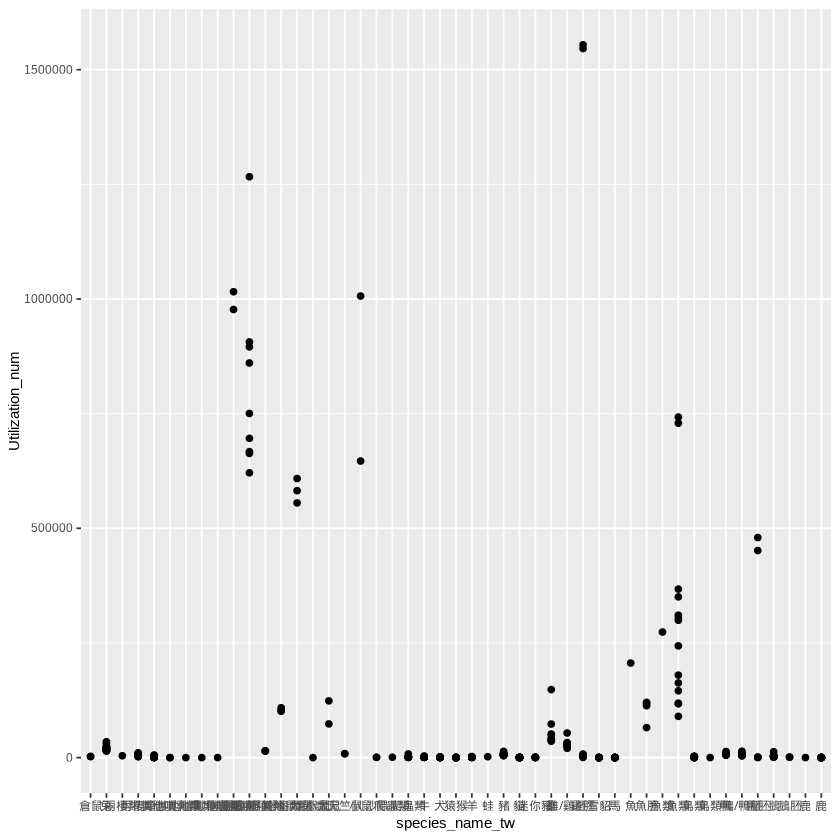

In [20]:
ggplot(dataset, aes(species_name_tw, Utilization_num)) +geom_point()

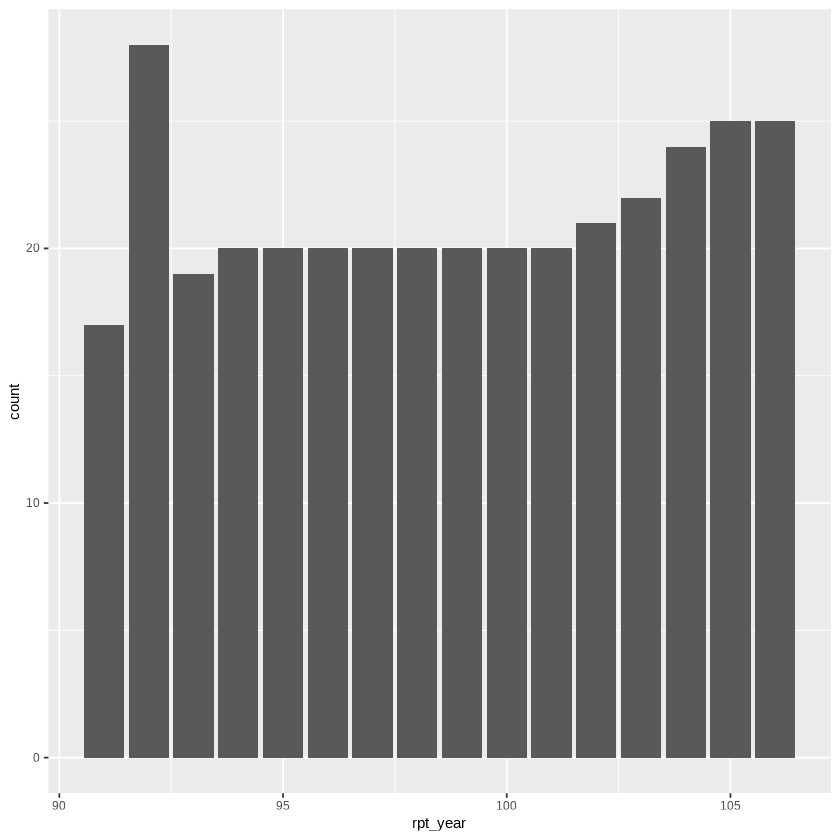

In [31]:
ggplot(dataset, aes(rpt_year)) +geom_bar()

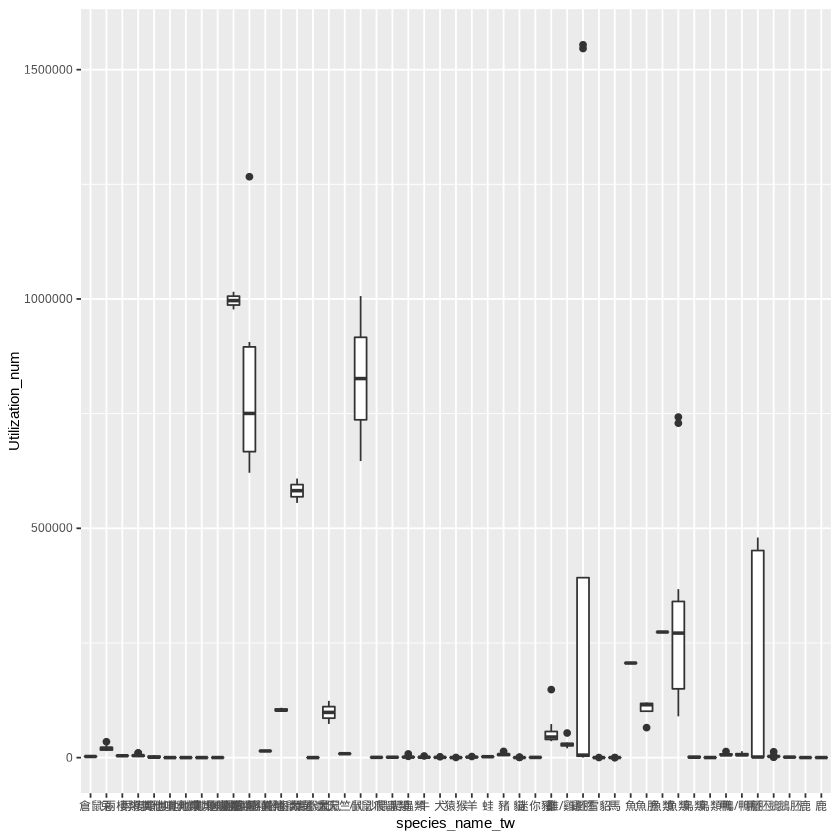

In [30]:
ggplot(dataset, aes(species_name_tw, Utilization_num)) +geom_boxplot()

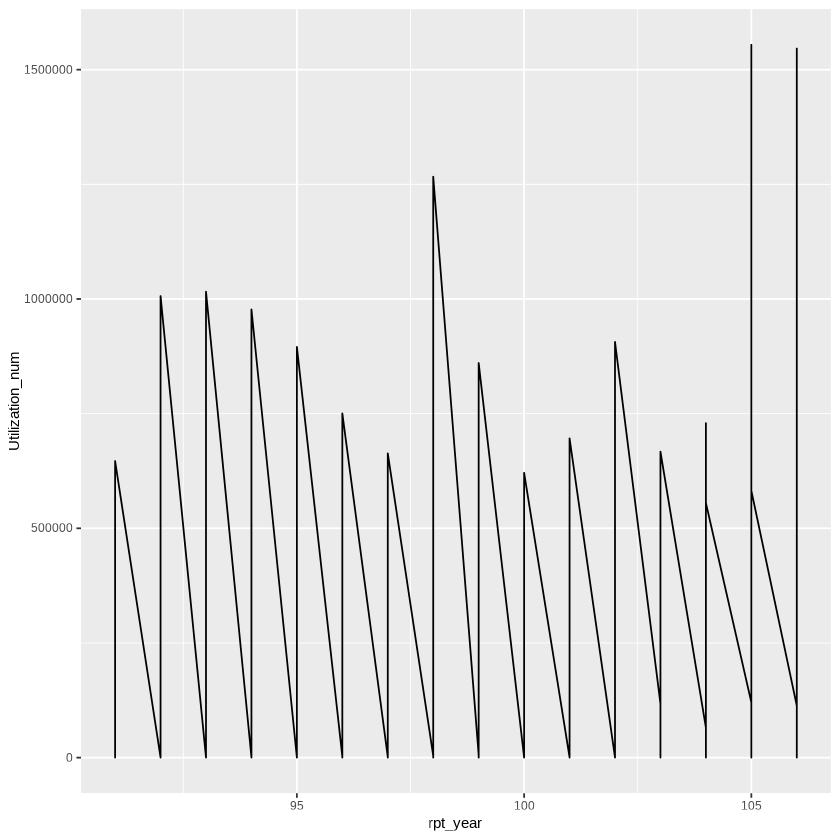

In [28]:
ggplot(dataset, aes(rpt_year, Utilization_num)) +geom_line()